# Análise e comparação de indicadores econômicos
##### O objetivo é analisar indicadores econômicos e enxergar na prática as correlações entre eles.

## - Taxa de Juros e Inflação

* Inflação

In [80]:
# Importação das bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import quandl
import investpy
from datetime import datetime
%matplotlib inline

In [3]:
# Obtenção dos dados referentes ao IPCA acumulado de 12 meses na base de dados do Quandl
ipca_acumulado = pd.DataFrame()
ipca_acumulado = quandl.get("BCB/13522")
ipca_acumulado.head()

,Value
Date,
1980-12-31,99.25
1981-01-31,99.67
1981-02-28,103.07
1981-03-31,101.03
1981-04-30,103.27


In [4]:
# Filtragem dos dados para pegar apenas a série a partir de 2010
ipca_acumulado2010 = ipca_acumulado[ipca_acumulado.index.year>=2010]
ipca_acumulado2010.head()

,Value
Date,
2010-01-31,4.59
2010-02-28,4.83
2010-03-31,5.17
2010-04-30,5.26
2010-05-31,5.22


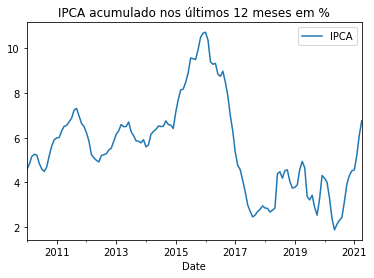

In [92]:
# Plot dos dados
ipca_acumulado2010.plot()
plt.title('IPCA acumulado nos últimos 12 meses em %')
plt.legend(['IPCA'])
plt.show()

* Taxa Selic

In [57]:
# Função que acessa a API de dados abertos do Banco Central
def consulta_bc(codigo):
    url = f"http://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo}/dados?formato=json"
    df = pd.read_json(url)
    df['data'] = pd.to_datetime(df['data'], dayfirst = True)
    df.set_index('data', inplace=True)
    return df

In [60]:
# Obtenção da série histórica da taxa selic anualizada (base 252) e filtragem dos dados (a partir de 2010)
selic_anualizada = pd.DataFrame()
selic_anualizada = consulta_bc(1178)
selic_anualizada2010 = selic_anualizada[selic_anualizada.index.year >= 2010]
selic_anualizada2010.head()

,valor
data,
2010-01-04,8.65
2010-01-05,8.65
2010-01-06,8.65
2010-01-07,8.65
2010-01-08,8.65


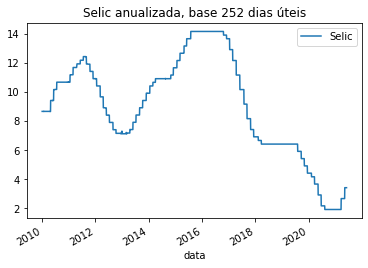

In [93]:
# Plotagem da taxa selic
selic_anualizada2010.plot()
plt.title('Selic anualizada, base 252 dias úteis')
plt.legend(['Selic'])
plt.show()

* Comparação

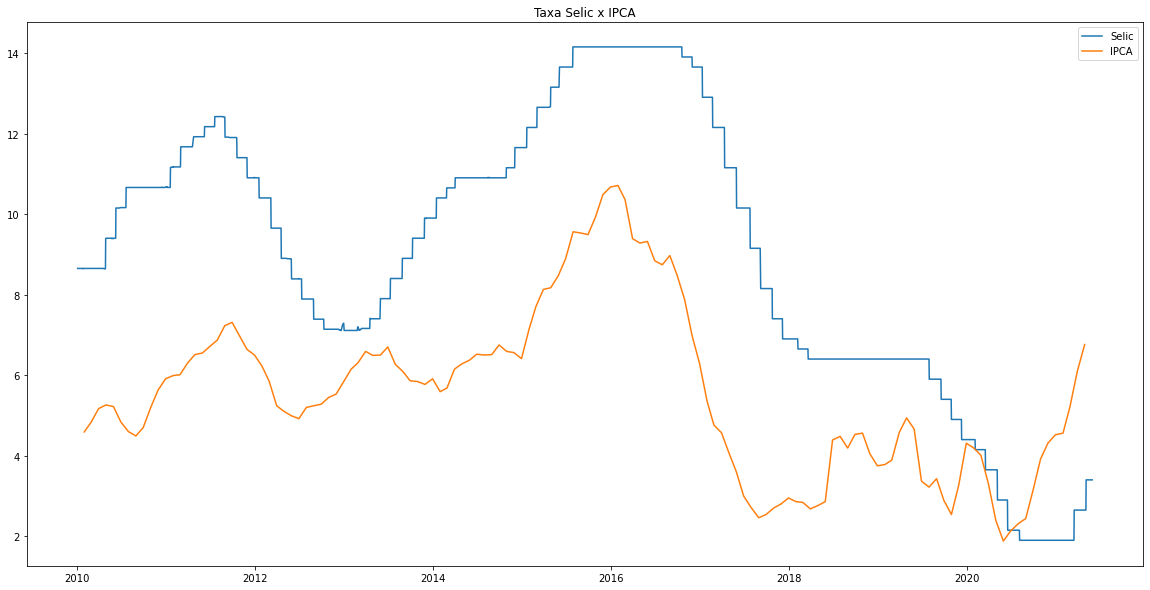

In [84]:
# Plotagem de ambas as séries no mesmo gráfico para efeitos de comparação
fig = plt.figure(figsize=(20,10))

plt.plot(selic_anualizada2010.index, selic_anualizada2010)
plt.plot(ipca_acumulado2010.index, ipca_acumulado2010 )
plt.title('Taxa Selic x IPCA')
plt.legend(['Selic','IPCA'])
plt.show()

Podemos observar a forte correlação entre a taxa Selic e o IPCA. Isso ocorre pois a taxa é um dos principais instrumentos utilizados pelo Banco Central para controlar o liquidez na economia. A medida que há mais moeda em circulação, a tendência é que o preço de equilíbrio de produtos e serviços aumente, e isso é medido pelo índice de preços ao consumidor. Com isso o BACEN, atráves das reuniões do COPOM, deve elevar a taxa Selic para cumprir a meta de inflação. O inverso também é verdadeiro: quando vemos uma diminuição no índice de preços e uma desaceleração da economia, a taxa é diminuida a fim de estimulá-la. É justamente essa a relação que pode ser observada nos gráficos.

-------------------------

## - Taxa de Câmbio e Risco País

* Taxa de Câmbio

In [32]:
# Obtenção dos dados referentes a cotação USD/BRL na base de dados do Investing.com
taxa_cambio = investpy.get_currency_cross_historical_data(currency_cross='USD/BRL', from_date='01/01/2005',
to_date='01/01/2021')
taxa_cambio = taxa_cambio['Close']
taxa_cambio.head()


Date
2005-01-03    2.6759
2005-01-04    2.7190
2005-01-05    2.7145
2005-01-06    2.7218
2005-01-07    2.7120
Name: Close, dtype: float64

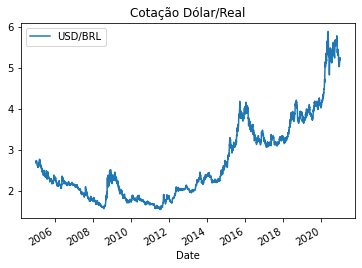

In [94]:
# Plotagem da taxa de câmbio
taxa_cambio.plot()
plt.title('Cotação Dólar/Real')
plt.legend(['USD/BRL'])
plt.show()

* Risco País (EMBI+)

In [36]:
# Para obter essa série histórica, é necessário fazer um scraping no site do Ipeadata
url = 'http://www.ipeadata.gov.br/ExibeSerie.aspx?serid=40940&module=M'
dados_site = pd.read_html(url)
risco_pais = dados_site[2] 
risco_pais.head()

,0,1
0,Data,EMBI + Risco-Brasil
1,28/05/2021,261
2,27/05/2021,264
3,26/05/2021,265
4,25/05/2021,271


In [37]:
# Corrigindo o dataframe obtido através do scraping do site
colunas = ['Data','EMBI+']
risco_pais.columns = colunas
risco_pais.drop(0, axis=0, inplace=True)
risco_pais.set_index('Data',inplace=True)

In [95]:
# Passando os valores do risco país de string para float
risco_pais['EMBI+'] = risco_pais['EMBI+'].astype(float)

In [70]:
# Passando as datas de string pra datetime
risco_pais.index = pd.to_datetime(risco_pais.index, format = '%d/%m/%Y')

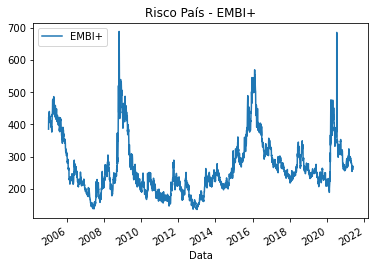

In [96]:
# Filtrando os dados a partir de 2005 e fazendo o plot
risco_pais2005 = risco_pais[risco_pais.index.year>=2005]
risco_pais2005.plot()
plt.title('Risco País - EMBI+')
plt.legend(['EMBI+'])
plt.show()

* Comparação

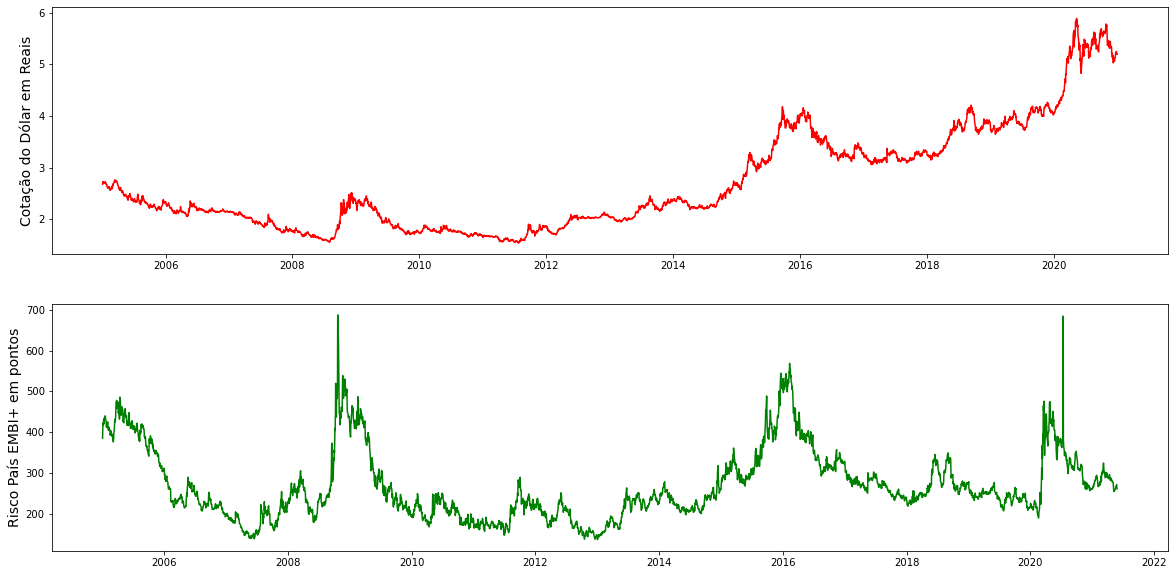

In [91]:
# Plotagem de ambas as séries para efeito de comparação
x1 = taxa_cambio.index
x2 = risco_pais2005.index
y1 = taxa_cambio
y2 = risco_pais2005['EMBI+']

fig, (ax1,ax2) = plt.subplots(2,1,figsize = (20,10))
ax1.set_ylabel("Cotação do Dólar em Reais", fontsize=14)
ax2.set_ylabel("Risco País EMBI+ em pontos", fontsize=14)
curve1 = ax1.plot(x1,y1, color = 'r', label = 'Taxa selic')
curve2 = ax2.plot(x2,y2, color = 'g', label = 'Ibovespa')
plt.plot()
plt.show()

Ao comparar a cotação do dólar e a medição de risco-país EMBI+ realizada pelo JPMorgan, é possível observar que nos momentos em que há um grande aumento na percepção de risco, seja por fatores internos como em 2016, quanto por fatores externos como as crises de 2008 e 2020, há também muita fuga de capital estrangeiro, e o consequente aumento da cotação do dólar.

--------

## Correlação entre o desempenho da bolsa e as taxas de juros

* Taxa de Juros de Longo Prazo (10 Years Bonds)

In [97]:
# Obtenção dos dados referentes aos bonds de 10 anos na base de dados do Investing.com
juros_longo = pd.DataFrame()
juros_longo = investpy.get_bond_historical_data('Brazil 10Y', from_date = '01/01/2010', to_date = '01/01/2021')

In [98]:
juros_longo.tail(5)

,Open,High,Low,Close
Date,,,,
2020-12-24,7.096,7.096,7.096,7.096
2020-12-28,7.160,7.160,7.115,7.135
2020-12-29,7.150,7.150,6.950,6.950
2020-12-30,6.980,6.980,6.900,6.900
2020-12-31,6.900,6.900,6.900,6.900


<AxesSubplot:xlabel='Date'>

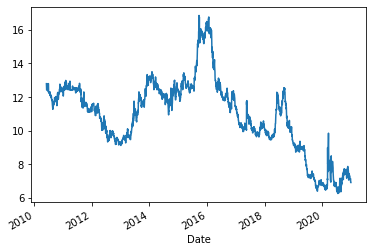

In [99]:
juros_longo['Close'].plot()

* Índice Bovespa

In [36]:
bolsa = investpy.get_index_historical_data(index='bovespa',
country='brazil',
from_date='01/01/2010',
to_date='01/01/2021')
bolsa = bolsa['Close']

* Comparação

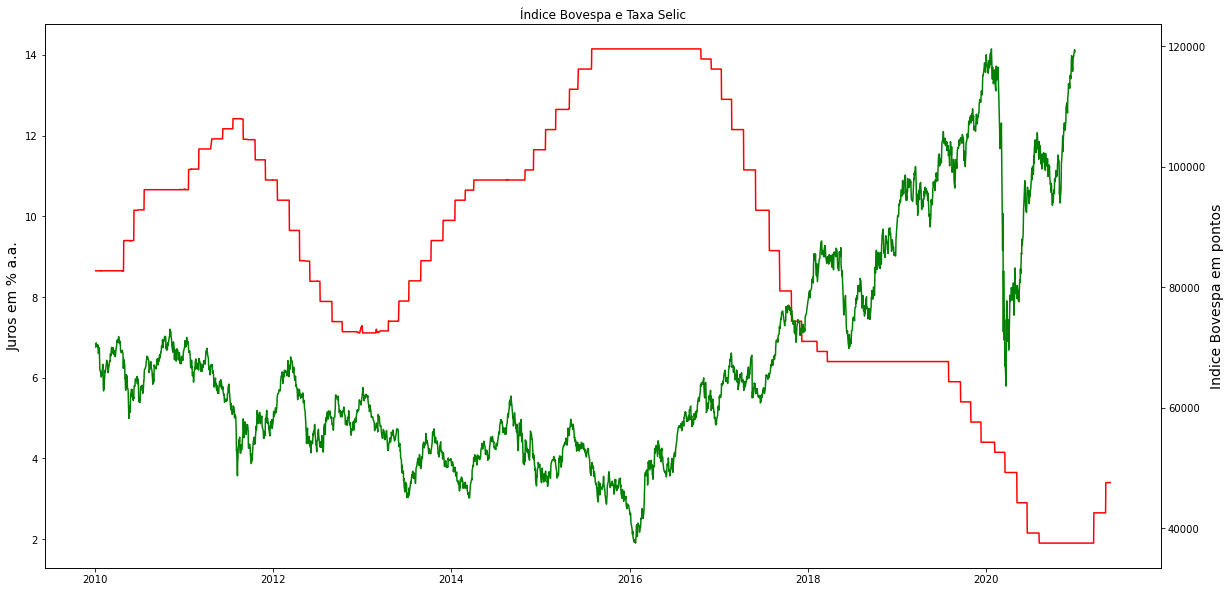

In [62]:
x1 = selic_anualizada2010.index
x2 = bolsa.index
y1 = selic_anualizada2010['valor']
y2 = bolsa

fig, ax1 = plt.subplots(figsize = (20,10))
ax2 = ax1.twinx()
ax1.set_ylabel("Juros em % a.a.", fontsize=14)
ax2.set_ylabel("Indice Bovespa em pontos", fontsize=14)
curve1 = ax1.plot(x1,y1, color = 'r', label = 'Taxa selic')
curve2 = ax2.plot(x2,y2, color = 'g', label = 'Ibovespa')
plt.title('Índice Bovespa e Taxa Selic')
plt.plot()
plt.show()

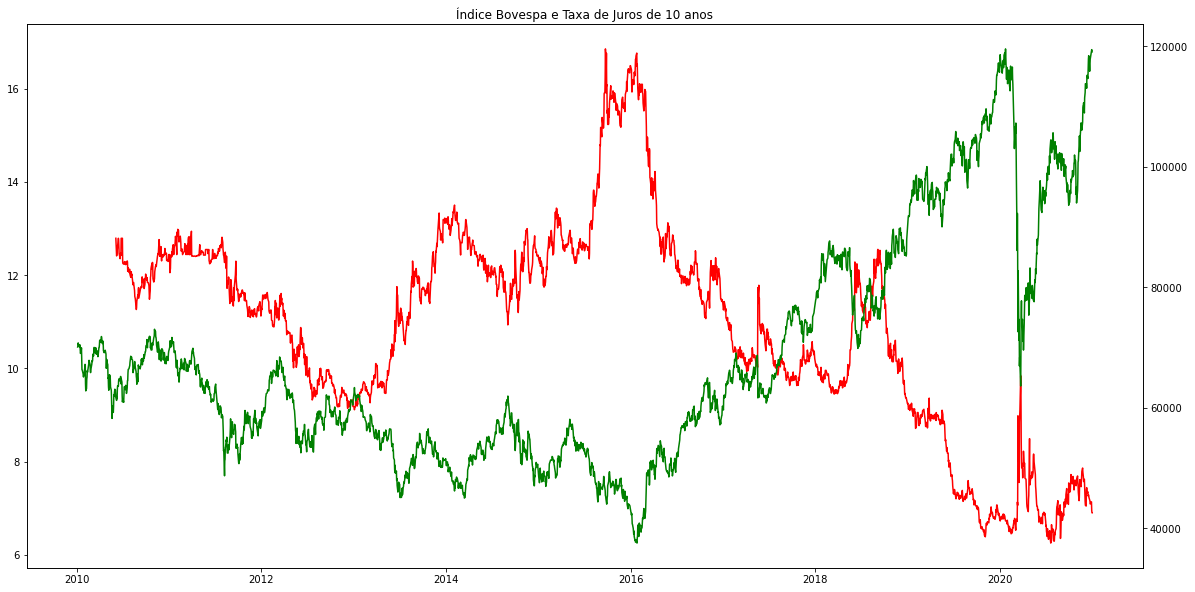

In [38]:
x1 = juros_longo.index
x2 = bolsa.index
y1 = juros_longo['Close']
y2 = bolsa

fig, ax1 = plt.subplots(figsize = (20,10))
ax2 = ax1.twinx()
curve1 = ax1.plot(x1,y1, color = 'r', label = 'Taxa de Juros Longa')
curve2 = ax2.plot(x2,y2, color = 'g', label = 'Ibovespa')
plt.title('Índice Bovespa e Taxa de Juros de 10 anos')
plt.plot()
plt.show()

Ao analisar os dois gráficos é possível observar que o desempenho da bolsa possui uma correlação muito maior com as taxas de juros de longo prazo (10-Year Bonds) do que com a taxa Selic. Isso ocorre porque a ponta longa da curva de juros, guiada pelo livre mercado, reflete muito mais o custo das dívidas para as empresas. Ao se projetar um fluxo de caixa de uma empresa, por exemplo, geralmente olhamos para um prazo de mais de 10 anos, por isso não faz sentido utilizar as taxas de juro de curto prazo na sua precificação. Entretanto é importante ressaltar que a ponta longa da curva de juros é sim influenciada pela taxa Selic, então de certa forma o desempenho da bolsa é também afetado por ela. 